# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [161]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [162]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [163]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
# Reading data in df_orig and creating a copy for analysis
df_orig = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
df = df_orig.copy()

In [165]:
# Write your code here to view the first 5 rows

# By default df.head() returns first 5 rows

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [166]:
# Write your code here
number_of_rows, number_of_columns = df.shape
print("Number of rows:", number_of_rows)
print("Number of columns:", number_of_columns)


Number of rows: 1898
Number of columns: 9


#### Observations:
* **There are 1898 rows and 9 columns in the data.**


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [167]:
# Write your code here
df.info()
# Also we can use dtypes.
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


#### Observations:
* **There are total 1898 records and no null entries.**
* **Total memory usage is about 133.6 Kb**

**Numerical Data:**

**There are 4 columns of integer type('order_id, 'customer_id, 'food_preparation_time' and 'delivery_time) and one floating point('cost_of_the_order)**
* **order_id and customer_id are unique identifiers.**
* **cost_of_order is floating point which makes sense because the cost can have decimals.**
* **food_preparation_time and delivery_time are integers since they represent the time in minutes.**

**Categorical Data:**

**There are 4 object type data('order_id', 'cuisine_type', 'day_of_the_week' and 'rating')**
* **restaurant_name, cuisine_type, day_of_the _week and ratings are stored as strings.**
* **Even though ratings is of type object, it may contain non-numerical value such as "Not given", which may be need special handling during the analysis.**




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [168]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
* **No there are no missing values in the data.**


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [169]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
* **minimum time to prepare the food: 20 minutes**
* **average time to prepare the food: 27.37 minutes**
* **maximum time to orepare the food: 35 minutes**
* **The cost of the order ranges from 4.47 to 35.41 dollars, the average order of the food is around 16.5 dollars. The cost of 75% of the order is below $23**
* **The delivery time ranges between 15 to 33 minutes**


### **Question 5:** How many orders are not rated? [1 mark]

In [170]:
# Write the code here
df[df['rating'] == 'Not given'].shape[0]

736

#### Observations:
* **Data set has 736 orders which are not rated.**

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Order ID

In [171]:
# Unique order ID
df['order_id'].nunique()

1898

### Observations:
* **There are 1898 unique orders**

### Customer ID

In [172]:
# Unique customer ID
df['customer_id'].nunique()

1200

### Observations:
* **There are 1200 unique customers. And since the unique order is greter than customer id, we can say some customers have placed more than one order.**

### Restaurant name:

In [173]:
# unique restaurnat name
num_restaurants = df['restaurant_name'].nunique()
print(f"Number of unique restaurants: {num_restaurants}")

# Number of orders served by each restaurant.
df['restaurant_name'].value_counts()

Number of unique restaurants: 178


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


### Observations:
* **There are total of 178 restaurants and 'Shake Shack' has the most number of orders followed by 'The Meatball Shop', 'Blue Ribbon Sushi' etc**

In [174]:
df['cuisine_type'].nunique()


14

### Observations:
* **There are 14 uniques cuisines**

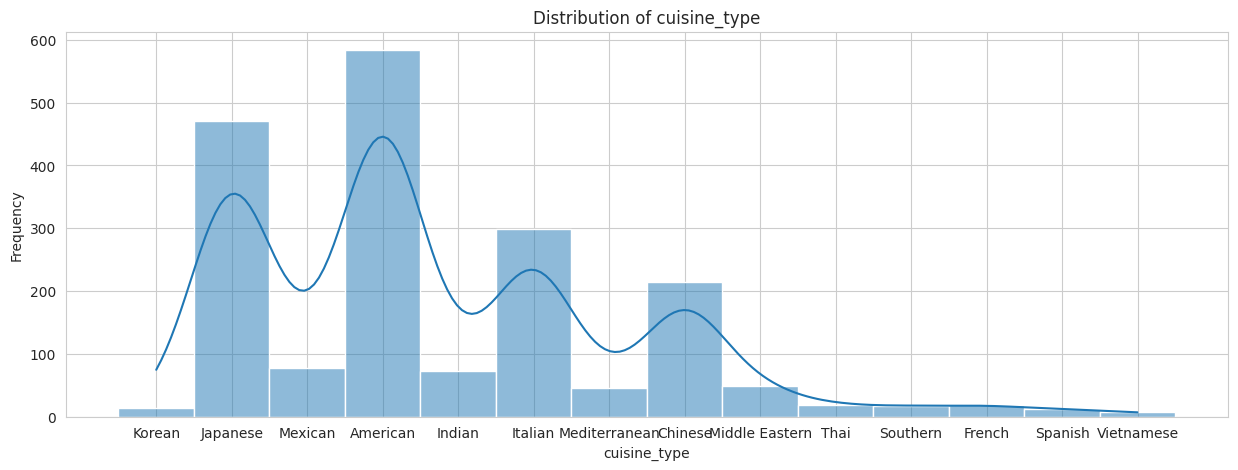

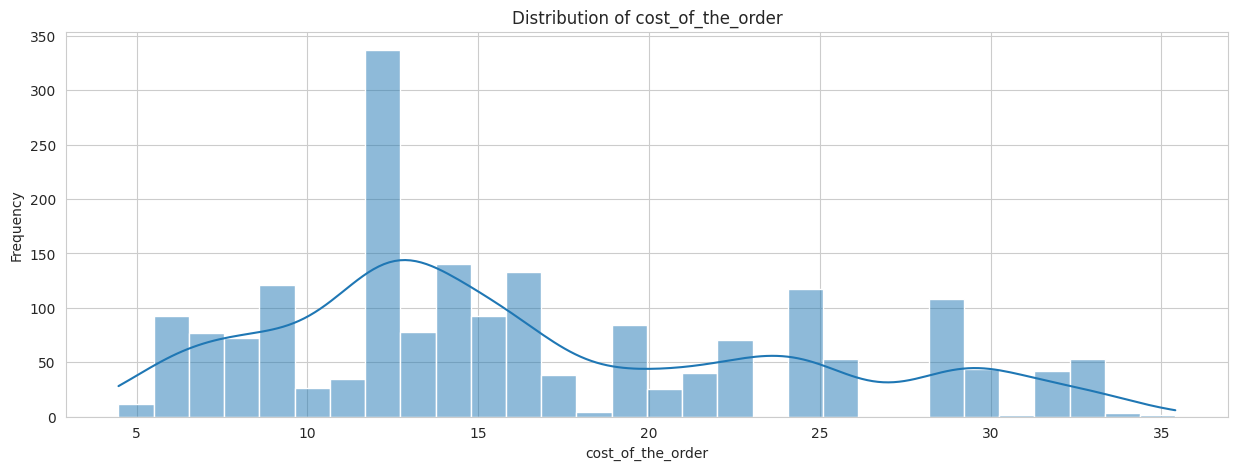

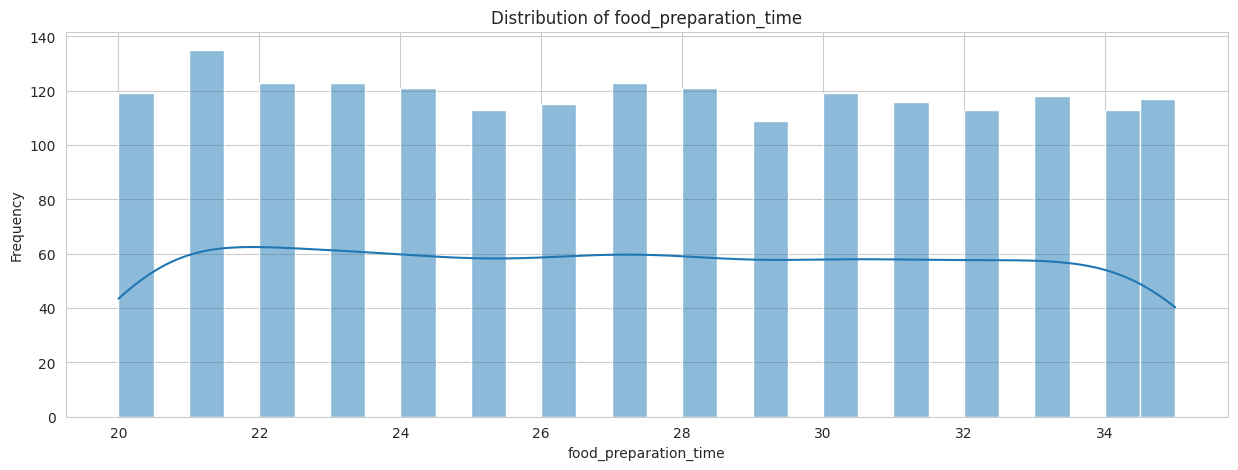

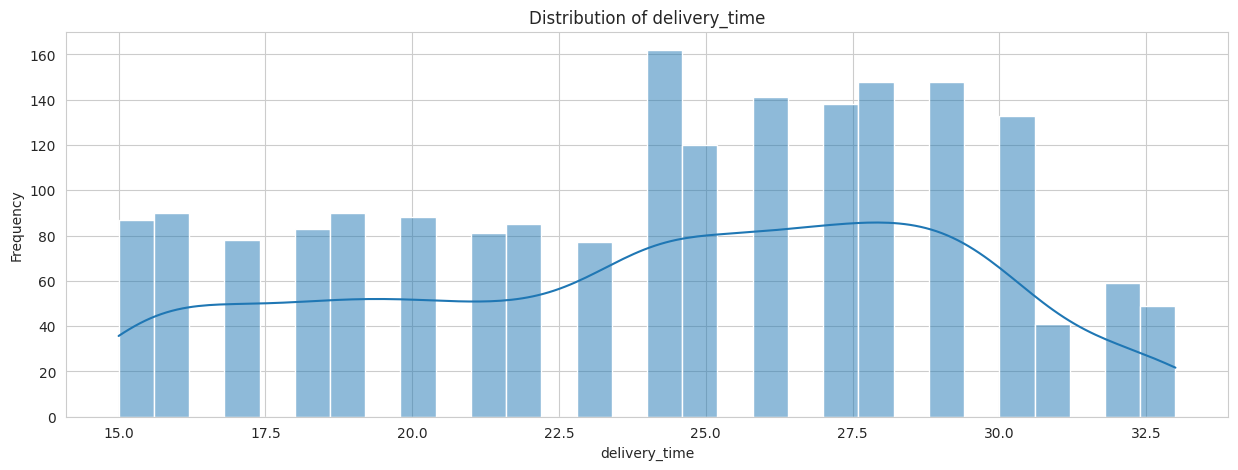

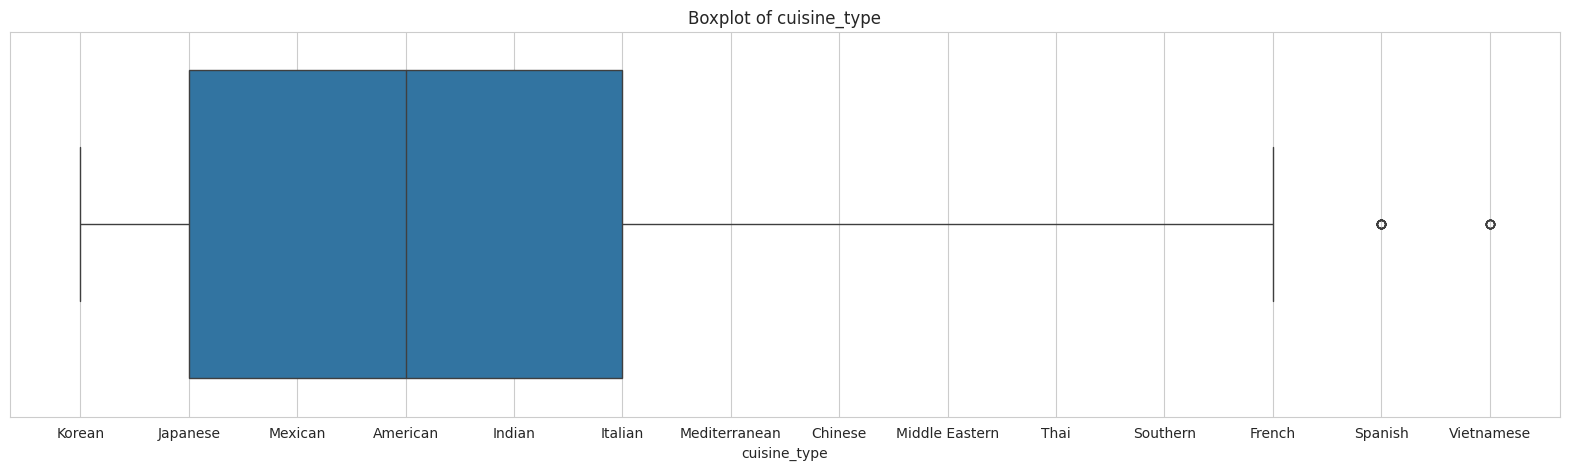

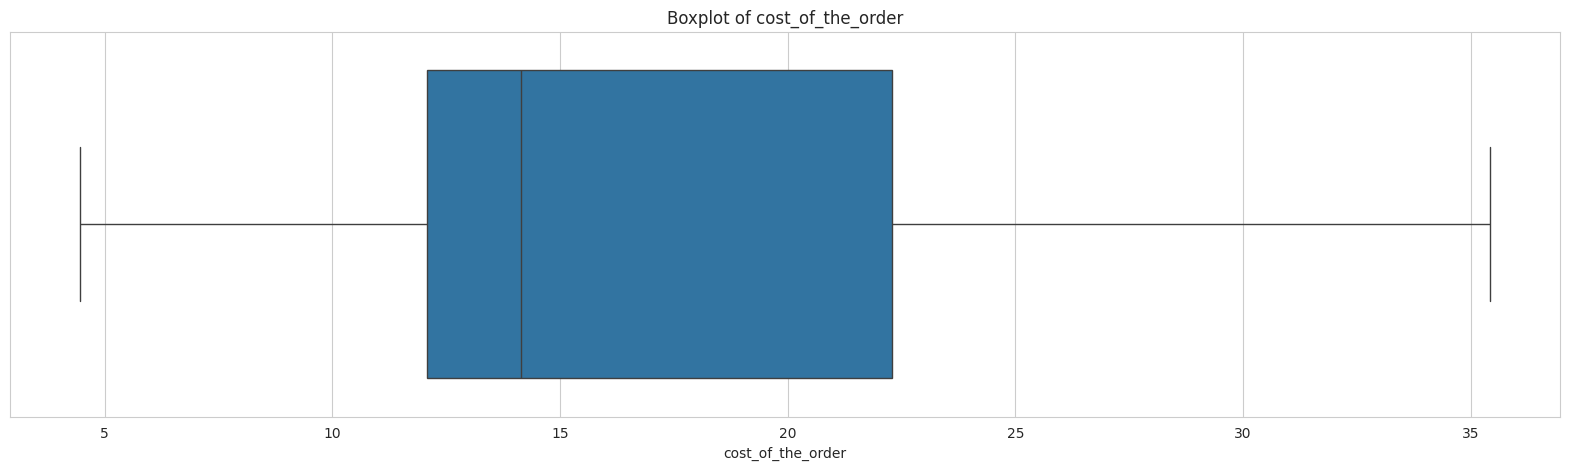

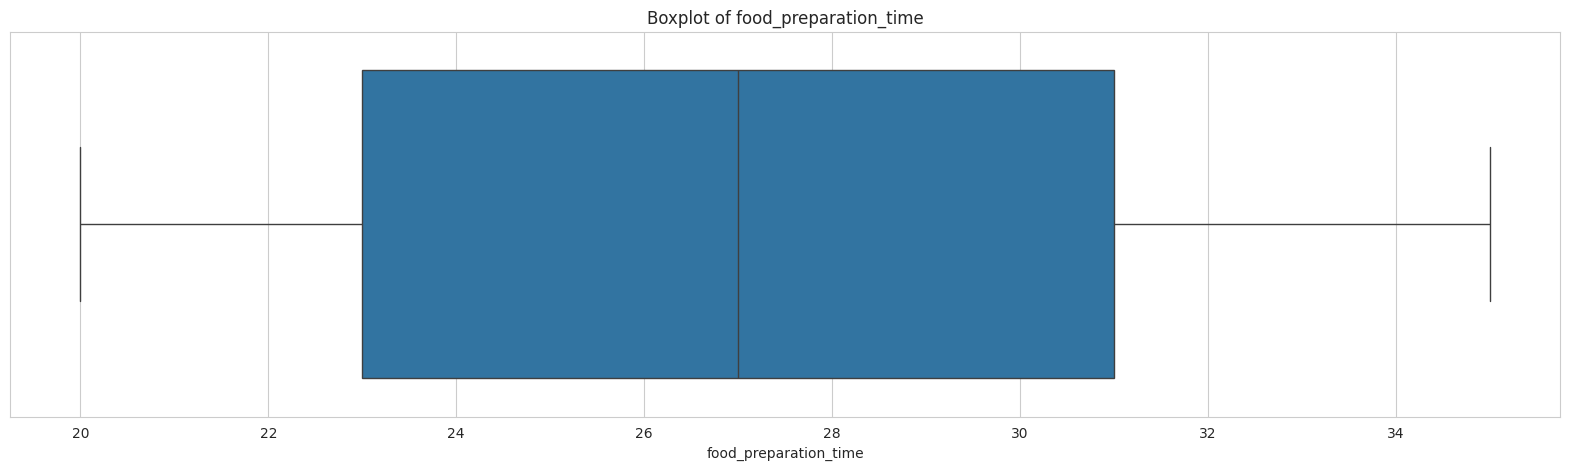

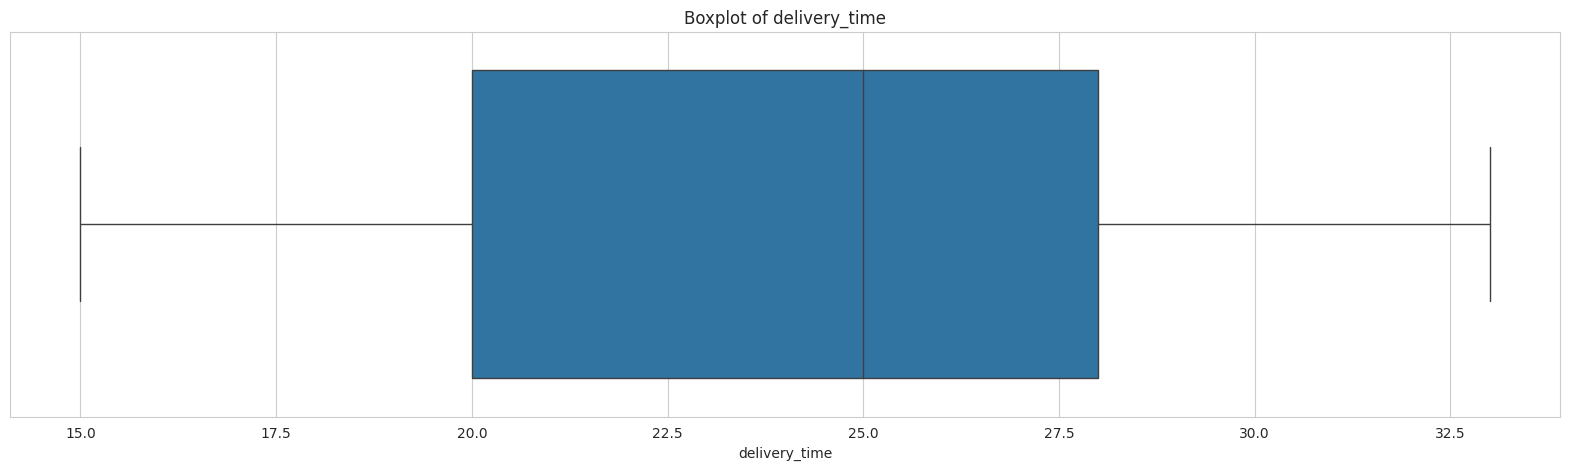

In [175]:
# Write the code here
# set the plot style
sns.set_style('whitegrid')

# Lets perform Univariate analysis
numeric_columns = ['cuisine_type','cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Histogram
for col in numeric_columns:
    plt.figure(figsize=(15, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplot
for col in numeric_columns:
    plt.figure(figsize=(20, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

### Observations:
**Cuisine Type:**
* **There are 14 cuisines in the data**
* **American seems to be popular followed by Japanese and Italian**
* **Vietnameses is least popular**

**Cost of Order:**
* **It seems that most people prefer food that costs around 10-12 dollars**
* **There are few orders that cost more than 30 dollars**
* **The mode of distribution indicates there is a preference of food that costs between 10-12 Dollars**

**Food Preparation Time**
* **Food preparatin time is evenly distributed**
* **There are no outliers**

**Delivery Time**
* **The average delivery time is a little less thatn the median delivery time which indicates the distribution is a bit left-skewed**
* **Most of the deliveries are between 24 and 30 minutes**


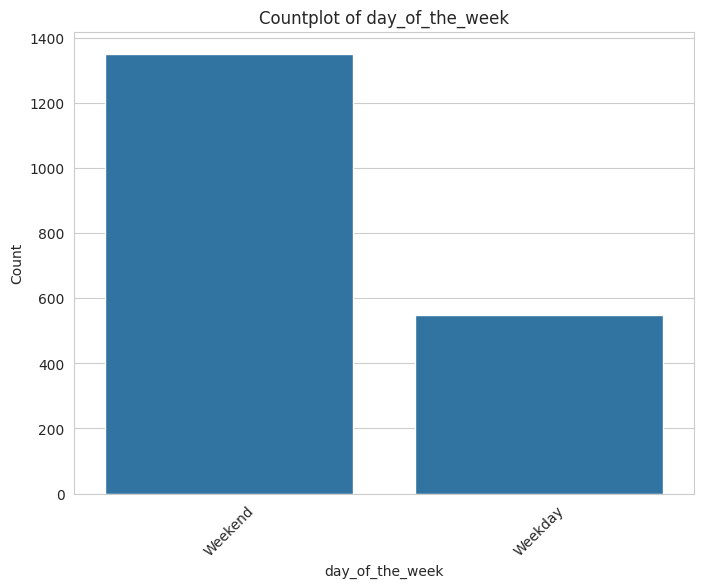

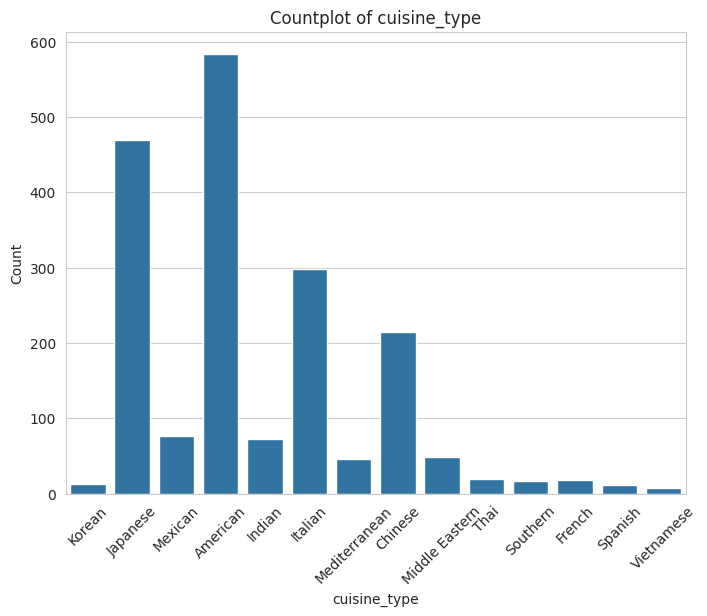

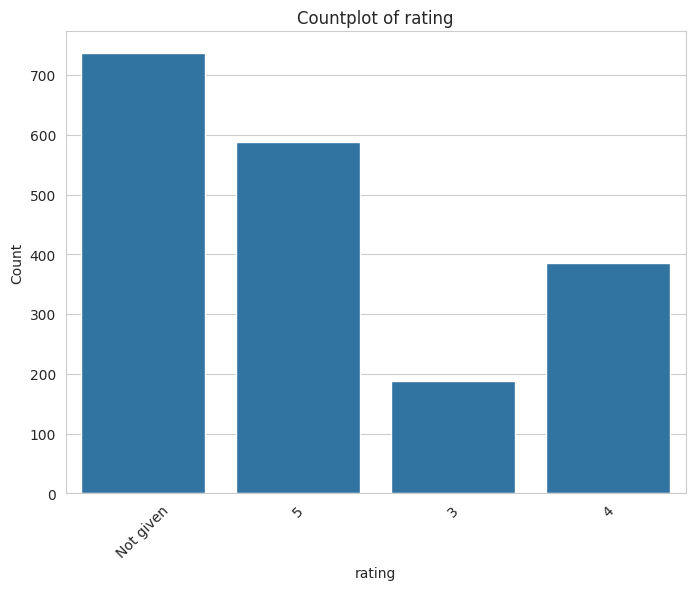

In [176]:
categorical_columns = ['day_of_the_week', 'cuisine_type', 'rating']
# Countplots
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


### Observations:
* **There are two values for 'day_of_the_week' - Weekdays and Weekend**
* **The distribution shows that Weekend orders are approximately twice the orders placed on weekdays**
* **The distribution of 'ratings' shoes that customers don't give the ratings all time, followed by a ratings of 5**
* **About 580 orders have been rated 5, followed by 380 orders rated 4 and 180 orders rated 3**


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [177]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
* **Shake Shack leads in the number of orders received followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm**


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [178]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()

'American'

#### Observations:
* **American Cuisine is very popular on the weekends.**


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [179]:
# Total number of orders
total_orders = len(df)

# number of orders costing more that $20
orders_costing_more_than_20 = len(df[df['cost_of_the_order'] > 20])
print(f"Total number of orders: {total_orders}")
print(f"Number of orders costing more than $20: {orders_costing_more_than_20}")

# calculate percent of orders
percentage = (orders_costing_more_than_20 / total_orders) * 100

print(f"{percentage:.2f}% of the orders cost more than $20.")


Total number of orders: 1898
Number of orders costing more than $20: 555
29.24% of the orders cost more than $20.


#### Observations:
* **29.24% of the orders cost more than $20.**


### **Question 10**: What is the mean order delivery time? [1 mark]

In [180]:
# Write the code here
round(df['delivery_time'].mean(), 2)

24.16

#### Observations:
* **Mean delivery time 24.16 on average**


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [181]:
# Write the code here
top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
* **customer ID: 52832 - total 13 orders**
* **customer ID: 47440 - total 10 orders**
* **customer ID: 83287 - total 9  orders**


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


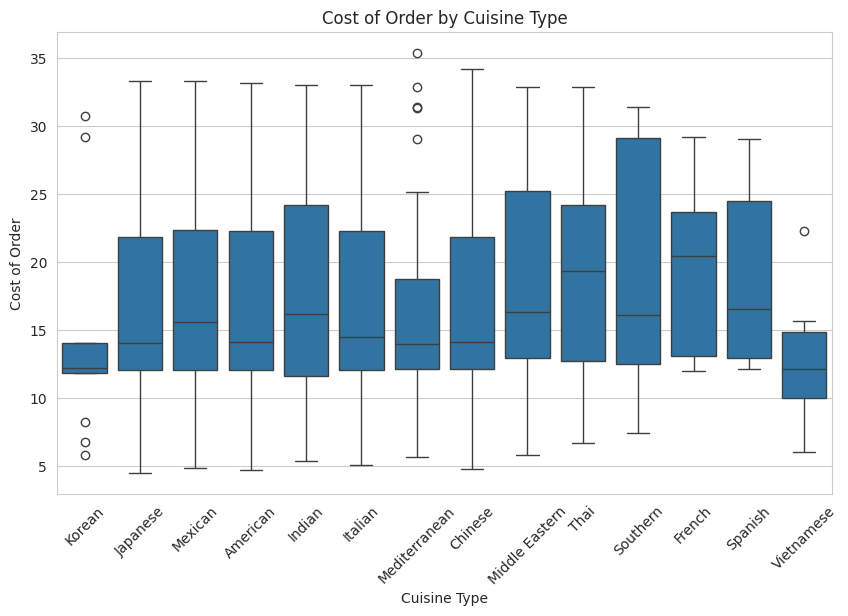

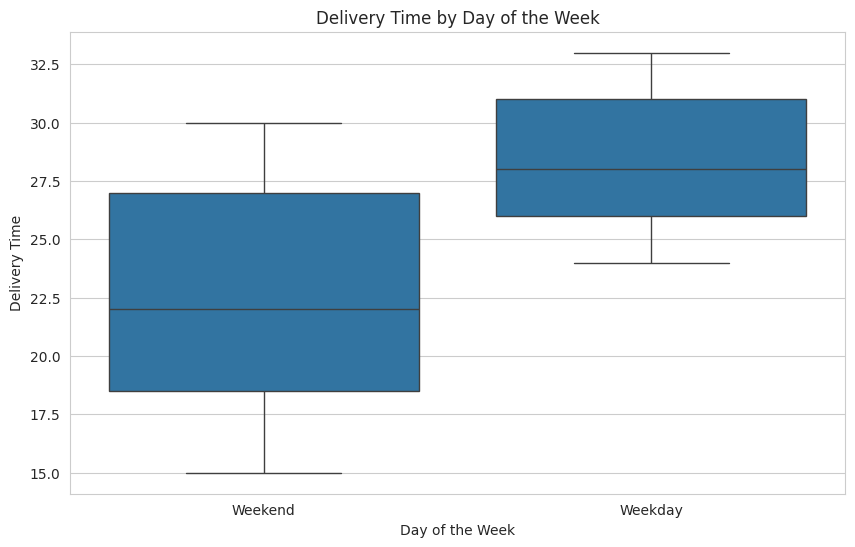

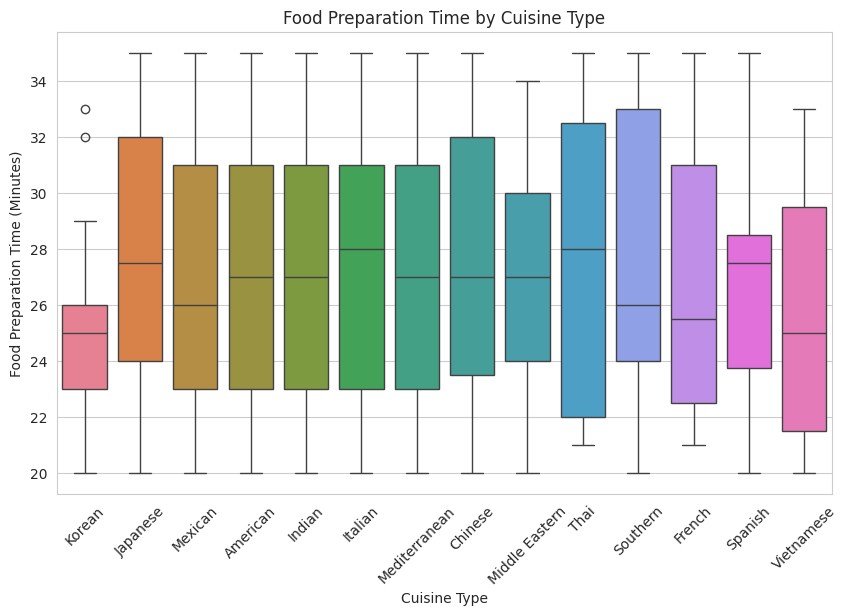

In [182]:
# Boxplot: cost of order by cuisine type
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Cost of Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.xticks(rotation=45)
plt.show()

# Boxplot: Delivery time and day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

# Boxplot: Cuisine Type and food preparation time
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, hue='cuisine_type', legend=False)
plt.xticks(rotation=45)
plt.title("Food Preparation Time by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Food Preparation Time (Minutes)")
plt.show()

### Observations
**Cuisine Type and Cost of order**
* **Vietnamese and Korean cost less compared to other cuisines**
* **There are outliers present for Vietnamese, Korean and Mediterranean cuisines**
* **French and Thai are costliers than other cuisines**
* **American, chinese and Japenese have similar quartile costs**

**Day of week and delivery time**
* **Delivery time is on the weekends is less compared to Weekdays**

**Cuisine Type and Food Preparation Time**
* **The food preparation time is consistent for most cuisines**
* **Korean takes less time compared to other cuisines**
* **There are outliers for Korean cuisine**


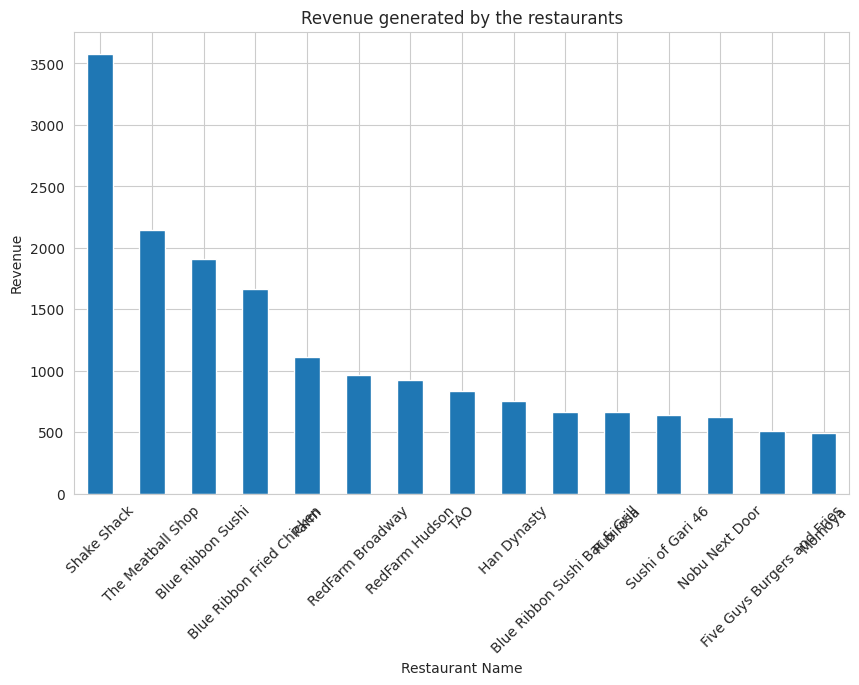

In [183]:
# Revenue generated by the restaurants.
plt.figure(figsize=(10, 6))
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Revenue generated by the restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


### Observatrions:
* **There are about 14 restaurants with revenue moire that $500**

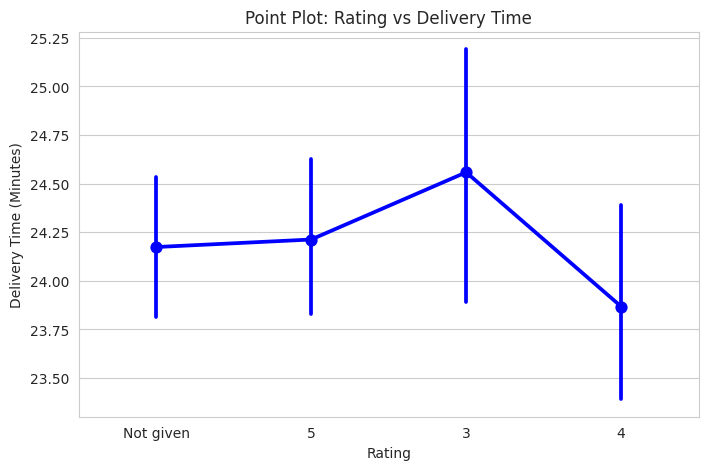

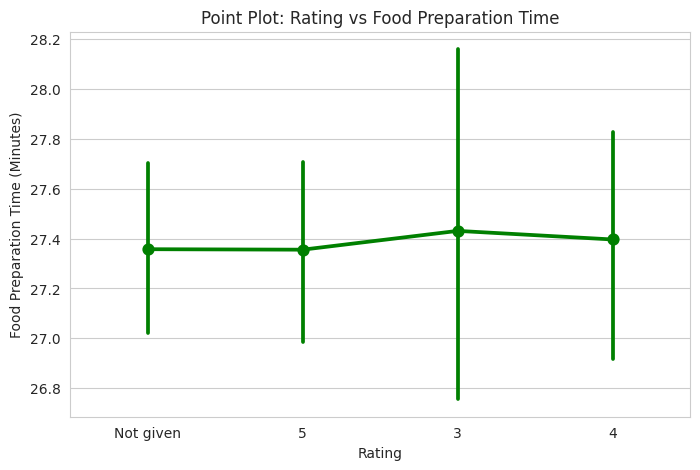

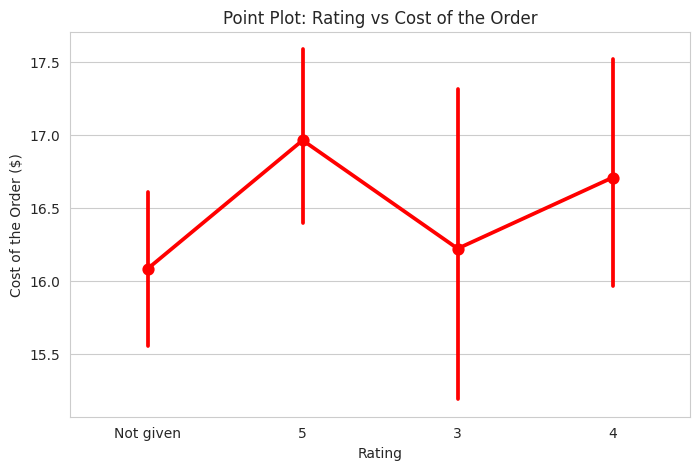

In [184]:
# Point Plot: Rating vs Delivery Time
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='rating', y='delivery_time', color='blue')
plt.title("Point Plot: Rating vs Delivery Time")
plt.xlabel("Rating")
plt.ylabel("Delivery Time (Minutes)")
plt.show()

# Point Plot: Rating vs Food Preparation Time
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='rating', y='food_preparation_time', color='green')
plt.title("Point Plot: Rating vs Food Preparation Time")
plt.xlabel("Rating")
plt.ylabel("Food Preparation Time (Minutes)")
plt.show()

# Point Plot: Rating vs Cost of the Order
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='rating', y='cost_of_the_order', color='red')
plt.title("Point Plot: Rating vs Cost of the Order")
plt.xlabel("Rating")
plt.ylabel("Cost of the Order ($)")
plt.show()


### Observations:
* **There is no clar trend between delivery time and rating, although it is possible the delivery time plays role in low-ratings**
* **Orders with higher ratings tend to have shorter preparations times, although i don't think there is correlation between preparation time and ratings**
* **It appears that higher cost of the foof seems to have better ratings than low cost foods**


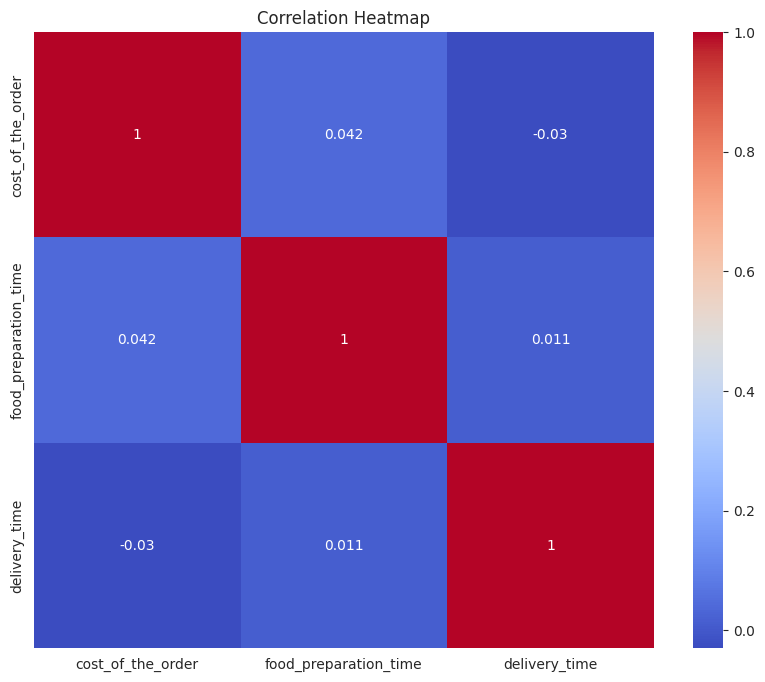

In [185]:
# heat map
column_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
df_corr = df[column_list]
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Observations:
* There doesn't seem to be any correlation between cost, delivery time and food preparation time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [186]:
# filter the rows where the ratings is "Not given"
# copy the dataframe to avoid modifying the original
df_rated_restaurants = df[df['rating'] != 'Not given'].copy()

# convert ratings columns from string/object type to float for numerical analysis.
df_rated_restaurants['rating'] = df_rated_restaurants['rating'].astype(float)

# group the dataset by 'restaurant_name' and aggregate the ratings to calculate the total count and average rating
df_rated_restaurants = df_rated_restaurants.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# find the restaurants with ratings more than 50 and average rating greater than 4
df_rated_restaurants = df_rated_restaurants[(df_rated_restaurants['count'] > 50) & (df_rated_restaurants['mean'] > 4)]

# sort restaurants by average ratings.
df_rated_restaurants = df_rated_restaurants.sort_values(by='mean', ascending=False)

# dump the final
df_rated_restaurants



,restaurant_name,count,mean
132,The Meatball Shop,84,4.511905
16,Blue Ribbon Fried Chicken,64,4.328125
117,Shake Shack,133,4.278195
17,Blue Ribbon Sushi,73,4.219178


#### Observations:
* **The restaurants 'The Meatball shop', 'Blue Ribbon Fried Chicken', 'Shake Shack' and 'Blue Ribbon Sushi' are eligible to receive the promotion**


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [187]:
high_commission = 0.25
low_commission = 0.15

# create a new column net_revenue
df['net_revenue'] = 0
df['net_revenue'] = df['net_revenue'].astype(float)

# populate net_revenue with the logic described in the question above.
df.loc[df['cost_of_the_order'] > 20, 'net_revenue'] = df['cost_of_the_order'] * high_commission
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'net_revenue'] = df['cost_of_the_order'] * low_commission

net_revenue = df['net_revenue'].sum()
print(f"The net revenue generated by the company across all orders is ${net_revenue:.2f}.")


The net revenue generated by the company across all orders is $6166.30.


#### Observations:
* **The net revenue generated by the company across all orders is $6166.30.**


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [188]:
# add new column to store the total delivery time.
df['total_time_prep_delivery'] = df['food_preparation_time'] + df['delivery_time']

total_orders = len(df)

orders_taking_more_than_60_minutes = len(df[df['total_time_prep_delivery'] > 60])

percentage = (orders_taking_more_than_60_minutes / total_orders) * 100

print(f"{percentage:.2f}% of the orders take more than 60 minutes to get delivered.")

10.54% of the orders take more than 60 minutes to get delivered.


#### Observations:
* **About 10.54% of the total orders have delivery time more than 60 minutes**


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [189]:
round(df['delivery_time'].groupby(df['day_of_the_week']).mean(), 2)

,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


#### Observations:
* **On average the delivery time on weekdays takes about 6 minutes longer**

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* **American cuisine is most popular**
* **About 80% of the orders are for American, Italian, Japanese and Chinese cuisines**
* **Weekends have higher volumes on orders, indicating peal demand**
* **Shake Shack is the most popular restaurant**
* **Average delivery time is about 24 minutes**
* **About 10.54% of orders take more than 60 minutes, which may imapct customer satisfaction**
* **Most orders have ratings of 4 or 5, indicating general customer satisfaction**
* **About 29.24% of orders cost more than 20 dollars which contribute to higher commision earnings**
* **Company earns $6,166.30 in total revenue**
* **High-cost orders(Japenese and korean cuisine) tend to get slightly better ratings**

### Recommendations:

* **Since weekends have peak demand, company should:**
  * **Increase delivery drivers**
  * **Offer pre-ordering or scheduled delivery options**
  * **Partner with high volume restaurants to optimize prep-time**
* **since 10.54% orders take over 60 minutes, focus on prioritzing orders from restaurants with longer pre time, expand delivery zones to reduce delays, maybe be introduce dynamic pricing incentives for faster deliveries**
* **Since 736 orders had no ratings, encourage feedback collection by offering discounts/loyalty points for submitting reviews**
* **Since 29.24% or orders are above 20%, leverage them to increase revenue by promoting premium priced menu items, offer discopunt and loyalty points for repeat custyomers and advertise top rated restaurants to increase sales**
* **Shake Shack, Meatball shop and Blue ribbon sushi generate most revenue and orders so feature hese restaurants in promotional campaigns and expand partnership with similar high-rated restaurants to drive more buisiness**


---